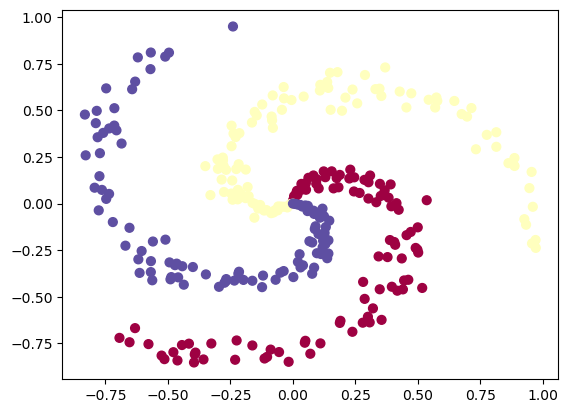

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

# Training a Softmax Linear Classifier

In [4]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# compute class scores for a linear classifier
scores = np.dot(X, W) + b

## Compute Loss
Cross-entropy loss for the softmax classifier
$L_i = -log(\frac{e^{f_{yi}}}{\sum_j e^{f_j}})$


In [6]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# we now have an array probs of size [300 x 3], where each row now contains the class probabilities. 
# in particular, since we’ve normalized them every row now sums to one. 
# we can now query for the log probabilities assigned to the correct classes in each example:
correct_logprobs = -np.log(probs[range(num_examples),y])

# the array correct_logprobs is a 1D array of just the probabilities assigned to the correct classes for each example. 
# full loss is then the average of these log probabilities and the regularization loss:
# compute the loss: average cross-entropy loss and regularization
reg = 1
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss


In [7]:
# Evaluating this in the beginning (with random parameters) might give us loss = 1.1, which is -np.log(1.0/3), 
# since with small initial random weights all probabilities assigned to all classes are about one third.
loss

1.0982350233047795

Gradient of the loss expression above turns out to a simple expression:
$\frac{\partial L_i}{\partial f_k} = \frac{e^{f_{yi}}}{\sum_j e^{f_j}} - \mathbb{1}(y_i=k)$

In [ ]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

step_size = 0.1
# perform a parameter update
W += -step_size * dW
b += -step_size * db

In [9]:
#Putting it all together
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print(f"iteration {i}: loss {loss}") 

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.0997765640215316
iteration 10: loss 0.9037893653314615
iteration 20: loss 0.830914822766434
iteration 30: loss 0.7976164823284247
iteration 40: loss 0.7801942844574092
iteration 50: loss 0.7702405013334943
iteration 60: loss 0.764201731535761
iteration 70: loss 0.7603774130995967
iteration 80: loss 0.7578770832539333
iteration 90: loss 0.7562021002030586
iteration 100: loss 0.7550584863839173
iteration 110: loss 0.7542657837920727
iteration 120: loss 0.7537095860794663
iteration 130: loss 0.753315440118727
iteration 140: loss 0.753033843185294
iteration 150: loss 0.7528312925521125
iteration 160: loss 0.7526847764036788
iteration 170: loss 0.7525782917594184
iteration 180: loss 0.7525005931114904
iteration 190: loss 0.7524437081648976


In [11]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


# Training a Neural Network
One hidden layer will suffice for this dataset.

In [ ]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [ ]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [ ]:
dhidden = np.dot(dscores, W2.T)
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)


In [13]:
# Putting it all together
# Simple neural network with numpy
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print(f"iteration {i}: loss {loss}")

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.0986489884611645
iteration 1000: loss 0.3634353611059059
iteration 2000: loss 0.26539513292727157
iteration 3000: loss 0.24995274849531815
iteration 4000: loss 0.24724383261963073
iteration 5000: loss 0.24601997341097417
iteration 6000: loss 0.24561711481682683
iteration 7000: loss 0.24535748792834747
iteration 8000: loss 0.2451935298807762
iteration 9000: loss 0.245080328190139


In [14]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99
